### Objective:This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

### In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.


In [2]:
import ast,requests,bs4
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import numpy as np
import os

pd.set_option('display.max_columns',None)

### 1. We start off by loading the "application_data.csv" and analyzing the missing values in each column
### Then we will move to dropping the columns where more than 25% of data is missing

In [3]:
#Finding the current directory and changing it to a predefined folder in the system where all the files will be kept.
print(os.getcwd())
os.chdir('E:\\F Drive\\MyInfo&learning\\UpGrad IIIT Data Science\\Assignment 3')
print(os.getcwd())
#Loading the application level data.
masterData=pd.read_csv('application_data.csv')
workingDataset=pd.DataFrame(masterData)

E:\F Drive\MyInfo&learning\Cygwin Shell
E:\F Drive\MyInfo&learning\UpGrad IIIT Data Science\Assignment 3


In [4]:
##Indentification of Categorical and Continuous variables. If count is limited then its a categorical var.
#for i in workingDataset.columns:
#    print("ColName:{}:Count:{}".format(i,workingDataset[i].nunique()))

workingDataset.nunique().sort_values(ascending=False)

SK_ID_CURR                    307511
EXT_SOURCE_2                  119831
EXT_SOURCE_1                  114584
DAYS_BIRTH                     17460
DAYS_REGISTRATION              15688
AMT_ANNUITY                    13672
DAYS_EMPLOYED                  12574
DAYS_ID_PUBLISH                 6168
AMT_CREDIT                      5603
LIVINGAREA_MODE                 5301
LIVINGAREA_MEDI                 5281
LIVINGAREA_AVG                  5199
TOTALAREA_MODE                  5116
BASEMENTAREA_MODE               3841
BASEMENTAREA_AVG                3780
DAYS_LAST_PHONE_CHANGE          3773
BASEMENTAREA_MEDI               3772
LANDAREA_MODE                   3563
LANDAREA_MEDI                   3560
LANDAREA_AVG                    3527
NONLIVINGAREA_MODE              3327
NONLIVINGAREA_MEDI              3323
NONLIVINGAREA_AVG               3290
COMMONAREA_MEDI                 3202
COMMONAREA_AVG                  3181
COMMONAREA_MODE                 3128
AMT_INCOME_TOTAL                2548
A

In [5]:
### Finding Categorical and Continuous variable depending on the number of unique values
#workingDataset.value_counts(axis=1).sort_values()
#a=workingDataset.nunique()
workingDataset.shape

(307511, 122)

### 2. Missing Data Analysis: We will check the % of missing values and delete columns having more than 25% of missing values. For the remaining columns we will analyze the data types and convert where ever required. We will also analyze the missing data and take a call on whether to impute or take no action on the missing data.

In [6]:
#Analysing Data: Finding the percentage of missing values per column
#workingDataset1=workingDataset[(round(100*masterData.isnull().sum(axis=0)/len(masterData.index),2))<20]
missingData=pd.DataFrame(round(100*masterData.isnull().sum(axis=0)/len(masterData.index),2))
missingData.reset_index(inplace=True)
missingData.columns=('col','Value')
#Drop columns where missing data is more than 25%
dropCol=missingData[missingData['Value']>25]
#print(dropCol.sort_values(by='Value', ascending=False))
workingDataset.drop(dropCol['col'],axis=1, inplace=True)
#print(workingDataset.head())


In [7]:
#Analysing the pending columns to check the percentage of missing values. Basis the below data, we will treat the missing 
#values 
pendingCols=pd.DataFrame(round(100*workingDataset.isnull().sum(axis=0)/len(workingDataset.index),2))
pendingCols.reset_index(inplace=True)
pendingCols.columns=('col','Value')
print(pendingCols.sort_values(by='Value', ascending=False).head(5))

                           col  Value
40                EXT_SOURCE_3  19.83
71  AMT_REQ_CREDIT_BUREAU_YEAR  13.50
70   AMT_REQ_CREDIT_BUREAU_QRT  13.50
69   AMT_REQ_CREDIT_BUREAU_MON  13.50
68  AMT_REQ_CREDIT_BUREAU_WEEK  13.50


In [8]:
#Checking for Datatypes of columns and converting whereever required to the necessary data type.
workingDataset.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

In [9]:
## Analysing data for missing columns and taking decision whether to impute or take no action
#1. Columna name:EXT_SOURCE_3  - This is the normalized score from external data source i.e. it can be a credit rating score.
# Here we find that there are almost 20% vaues missing and it will not be prudent to impute any data in place of it.
workingDataset.EXT_SOURCE_3.isnull().sum()

# Result: No action taken on missing values as quantum of missing data is large

60965

(307511, 72)
(307511, 72)


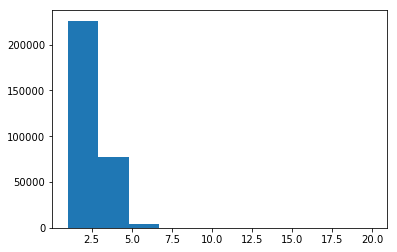

In [10]:
##Missing Data analysis:
#2: Column name:CNT_FAM_MEMBERS - This is the count of family members
##Converting datatype of "Count of Family members" from float to numeric as count of members cannot be a float value. 
#In the process of changing the column type, we will also handle the NaN values and impute them with the mean values
workingDataset.head()
print(workingDataset.shape)
workingDataset.CNT_FAM_MEMBERS.dropna()
print(workingDataset.shape)
workingDataset.loc[(workingDataset['CNT_FAM_MEMBERS'].isnull()),'CNT_FAM_MEMBERS']=workingDataset['CNT_FAM_MEMBERS'].mean()
workingDataset['CNT_FAM_MEMBERS'].isnull().sum()
##Changing the dtype of the column to int64 after cleaing the NaN values
#workingDataset['CNT_FAM_MEMBERS']=pd.to_numeric(workingDataset['CNT_FAM_MEMBERS'], errors='coerce')
plt.close('All')
workingDataset['CNT_FAM_MEMBERS']=workingDataset['CNT_FAM_MEMBERS'].astype('int64')
workingDataset['CNT_FAM_MEMBERS'].dtype
plt.hist(workingDataset['CNT_FAM_MEMBERS'])
plt.show()

#RESULT: Since only two missing values were present, we imputed it with the mean value. 

In [11]:
workingDataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### 3. Next we will identify a continuous variable and make buckets out of that data for easier analysis. 
### a. Column chosen is 'DAYS_BIRTH'. Will get a derived column of age from this datapoint and then will make buckets of age groups
### b. We will also do it for Amt_Credit column - Which is the loan amount given to the customer.
### c. We will also add a derived column which will find the loan to income ratio and again find bins for it.
### d. Another derived column is added which gives the number of years the customer has been employed at the time of applying the loan

In [12]:
#Creating a derived column age. Logic applied is that the data point given is the ae in days of the person at the time 
#of application. Since its a negative number, we convert it into a positive number and divide by approx 365.25
workingDataset['Age']=workingDataset['DAYS_BIRTH'].apply(lambda x:round(abs(x)/365.25))
workingDataset['EmployedYrs']=workingDataset['DAYS_EMPLOYED'].apply(lambda x:round(abs(x)/365.25))
#workingDataset['EmployedYrs'].value_counts().sort_values()
##Loking at the Days_employed data, it seems there are a lot of entries with value:365243 which seems like that 
##its is more of 365.243 days i.e. 1 Yr. Hence we will change all values of 1000 yrs of employement to 1 yr.
workingDataset.loc[(workingDataset['EmployedYrs']==1000),'EmployedYrs']=1
#workingDataset['EmployedYrs'].value_counts()


In [13]:
#First we will check the range of the available values and basis that decide on the bins to be created
workingDataset['Age'].value_counts().sort_values()
#Creating Bins
bins=[20,30,40,50,60,100]
labels=['<20','20-30','30-40','40-50','50-60','65+']
workingDataset['AgeBins']=pd.cut(workingDataset['Age'],bins,labels)
workingDataset['AgeBins'].value_counts().sort_values()
#plt.close('All')
#plt.hist(workingDataset['AgeBins'], bins=bins)
#plt.title('Age group of Customer applying for loan')
#plt.show()

(60, 100]    32154
(20, 30]     49064
(50, 60]     67971
(40, 50]     75477
(30, 40]     82845
Name: AgeBins, dtype: int64

In [14]:
#Creating Bins for Loan amounts taken
bins = [0, 50000, 100000, 300000,500000, 1000000, 1500000,2000000]
labels = ['0-50000', '50000-100000', '100000-300000', '300000-500000','500000-1000000', '1000000-1500000','1500000 and above']
workingDataset['Loan_Amnt_Range'] = pd.cut(workingDataset['AMT_CREDIT'], bins, labels)
workingDataset[['AMT_CREDIT','Loan_Amnt_Range']].tail(10)
#plt.countplot(workingDataset['Loan_Amnt_Range'])
#plt.show()
workingDataset['Loan_Amnt_Range'].value_counts(normalize=True)

(500000, 1000000]     0.354171
(100000, 300000]      0.278095
(300000, 500000]      0.191095
(1000000, 1500000]    0.128417
(1500000, 2000000]    0.028568
(50000, 100000]       0.017818
(0, 50000]            0.001836
Name: Loan_Amnt_Range, dtype: float64

In [15]:
##Creating a derived column: Ratio of Loan amount to the income
workingDataset['Loan_To_Income']=round(workingDataset['AMT_CREDIT']/workingDataset['AMT_INCOME_TOTAL'],2)
workingDataset['Loan_To_Income'].head()
bins_li=[0,1,2,3,4,5]
labels_li=['<1','1-2','2-3','3-4','4-5','5+']
workingDataset['Loan_to_income_bin']=pd.cut(workingDataset['Loan_To_Income'],bins_li,labels_li)
#workingDataset[['AMT_CREDIT','Loan_Amnt_Range','Loan_To_Income','Loan_to_income_bin']].tail(10)
workingDataset['Loan_to_income_bin'].value_counts()

(2, 3]    64874
(1, 2]    60184
(3, 4]    48666
(4, 5]    36839
(0, 1]    16226
Name: Loan_to_income_bin, dtype: int64

### 3B. Handling of outliers:


In [16]:
## Handling Outliers 
## 1. We will handle outliers in the Loan amount column
print(workingDataset['AMT_CREDIT'].describe())
upperQuantile = workingDataset['AMT_CREDIT'].quantile(0.995)
lowerQuantile = workingDataset['AMT_CREDIT'].quantile(0.02)
workingDataset = workingDataset[(workingDataset['AMT_CREDIT'] < upperQuantile)& (workingDataset['AMT_CREDIT'] > lowerQuantile)]
workingDataset['AMT_CREDIT'].describe()



count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


count    2.990590e+05
mean     6.022005e+05
std      3.804194e+05
min      1.023840e+05
25%      2.814930e+05
50%      5.212800e+05
75%      8.086500e+05
max      2.021625e+06
Name: AMT_CREDIT, dtype: float64

In [17]:
## Handling Outliers 
# 2. User Income column - Removing only the outlier in upper quartile (40 lacs). Lower quartile number is 
#within 3 STD Dev range and need not be removed.
workingDataset['AMT_INCOME_TOTAL'].describe()
maxIncome=max(workingDataset['AMT_INCOME_TOTAL'])
workingDataset.loc[workingDataset['AMT_INCOME_TOTAL']==maxIncome]
outlier_income = workingDataset['AMT_INCOME_TOTAL'].quantile(0.995)
workingDataset = workingDataset[workingDataset['AMT_INCOME_TOTAL'] < outlier_income]
workingDataset['AMT_INCOME_TOTAL'].describe()


count    297442.000000
mean     165237.159453
std       80186.612117
min       25650.000000
25%      112500.000000
50%      148500.000000
75%      202500.000000
max      580500.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [18]:
## Handling Outliers 
# 3. EmployedYrs column - Removing only the outlier in Lower quartile 
workingDataset['EmployedYrs'].describe()
minYrs=min(workingDataset['EmployedYrs'])
workingDataset.loc[workingDataset['AMT_INCOME_TOTAL']>minYrs]
#outlier_income = workingDataset['AMT_INCOME_TOTAL'].quantile(0.995)
#workingDataset = workingDataset[workingDataset['AMT_INCOME_TOTAL'] < outlier_income]
workingDataset['EmployedYrs'].describe()

count    297442.000000
mean          5.537396
std           6.180638
min           0.000000
25%           1.000000
50%           3.000000
75%           8.000000
max          49.000000
Name: EmployedYrs, dtype: float64

In [19]:
### Creating a backup dataframe to be used for merging with Previous application file
workingDatasetv1=pd.DataFrame(workingDataset)

### 4.Next we will do a Imbalance analysis on the target Column followed by univariate and bi-variate analysis.
### Target Value : 1 : Denotes client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample
### Target Value : 0 : all other cases

In [20]:
#Calculating imbalance percentage on Target Variable
imbalancePer=100*(workingDataset.TARGET.value_counts(normalize=True))
round(imbalancePer,2)


0    91.82
1     8.18
Name: TARGET, dtype: float64

In [21]:
#Next we will create seperate data frames for Target values of 0's and 1's and do univariate analysis on few 
#cateorical columns for both datasets.

df_0=workingDataset.loc[workingDataset.TARGET==0]
df_1=workingDataset.loc[workingDataset.TARGET==1]
print('DF_0 Rows,Col:',df_0.shape,'DF_1 Rows,Col:',df_1.shape)

DF_0 Rows,Col: (273124, 78) DF_1 Rows,Col: (24318, 78)


In [22]:
###Univariate analysis of Categorical Columns
### : First a basic univariate analysis basis count of values of each column for each of the two data sets. 
### This is just to get an idea of the distributions and for comparisons between both 
df_0.dtypes
categoricalCols=['Loan_to_income_bin','NAME_CONTRACT_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE'
,'AgeBins','NAME_FAMILY_STATUS','DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','Loan_Amnt_Range']
numCols=[]
#for i in df_0.select_dtypes(include=['object']):
for i in categoricalCols:
    print('**********','Target Value=0:',i,'**********')
    print(round(100*df_0[i].value_counts()/len(df_0.index)),2)
    #plt.hist(df_0[i])
    #plt.show()
    print('**********','Target Value=1:',i,'**********')
    #print(df_1[i].value_counts())
    print(round(100*df_1[i].value_counts()/len(df_1.index)),2)
    

********** Target Value=0: Loan_to_income_bin **********
(2, 3]    22.0
(1, 2]    19.0
(3, 4]    16.0
(4, 5]    12.0
(0, 1]     4.0
Name: Loan_to_income_bin, dtype: float64 2
********** Target Value=1: Loan_to_income_bin **********
(2, 3]    23.0
(1, 2]    18.0
(3, 4]    18.0
(4, 5]    13.0
(0, 1]     3.0
Name: Loan_to_income_bin, dtype: float64 2
********** Target Value=0: NAME_CONTRACT_TYPE **********
Cash loans         90.0
Revolving loans    10.0
Name: NAME_CONTRACT_TYPE, dtype: float64 2
********** Target Value=1: NAME_CONTRACT_TYPE **********
Cash loans         93.0
Revolving loans     7.0
Name: NAME_CONTRACT_TYPE, dtype: float64 2
********** Target Value=0: FLAG_OWN_CAR **********
N    66.0
Y    34.0
Name: FLAG_OWN_CAR, dtype: float64 2
********** Target Value=1: FLAG_OWN_CAR **********
N    69.0
Y    31.0
Name: FLAG_OWN_CAR, dtype: float64 2
********** Target Value=0: FLAG_OWN_REALTY **********
Y    69.0
N    31.0
Name: FLAG_OWN_REALTY, dtype: float64 2
********** Target Value=

In [23]:
##Writing another function to analyse variable through graphs:
##colAnalysis function will plot the graphs based on the parameters.
##    df      : dataframe name
##    col     : Column name
##    vartype : variable type : continuos or categorical
##                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
##                Categorical(1) : Countplot will be plotted.
##    hue     : It's only applicable for categorical analysis.
    
def colAnalysis(df,colname,contOrCat,hue =None):
    plt.close("all")
    sns.set(style="darkgrid")
    
    if contOrCat == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[colname],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=colname,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=colname,ax=ax[2],orient='v')
    
    if contOrCat == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[colname].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 4)
        ax = sns.countplot(data = df, x= colname, order=df[colname].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+0.05, p.get_height()+5))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()

(500000, 1000000]     36.0
(100000, 300000]      28.0
(300000, 500000]      20.0
(1000000, 1500000]    13.0
(1500000, 2000000]     3.0
(50000, 100000]        0.0
(0, 50000]             0.0
Name: Loan_Amnt_Range, dtype: float64


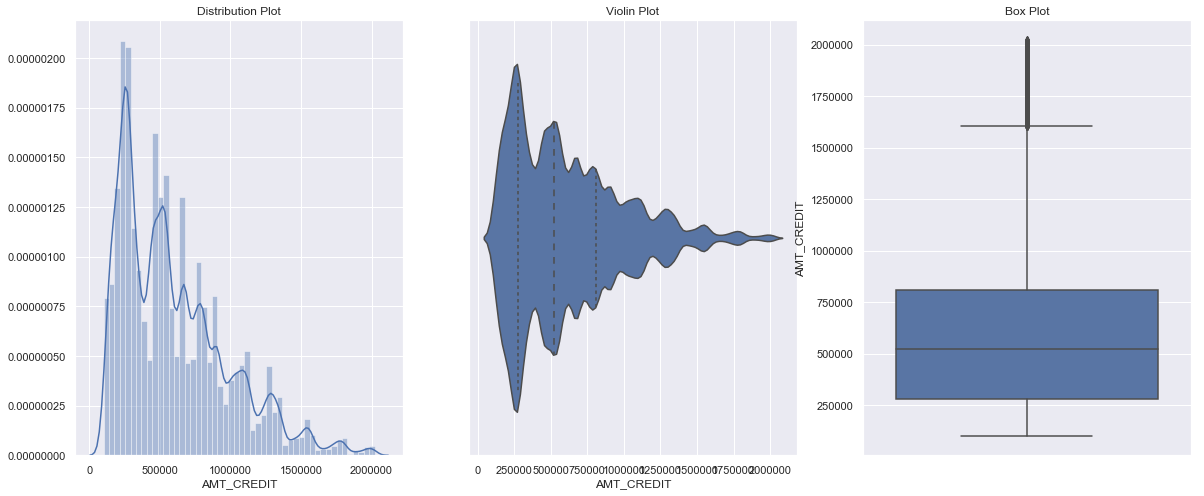

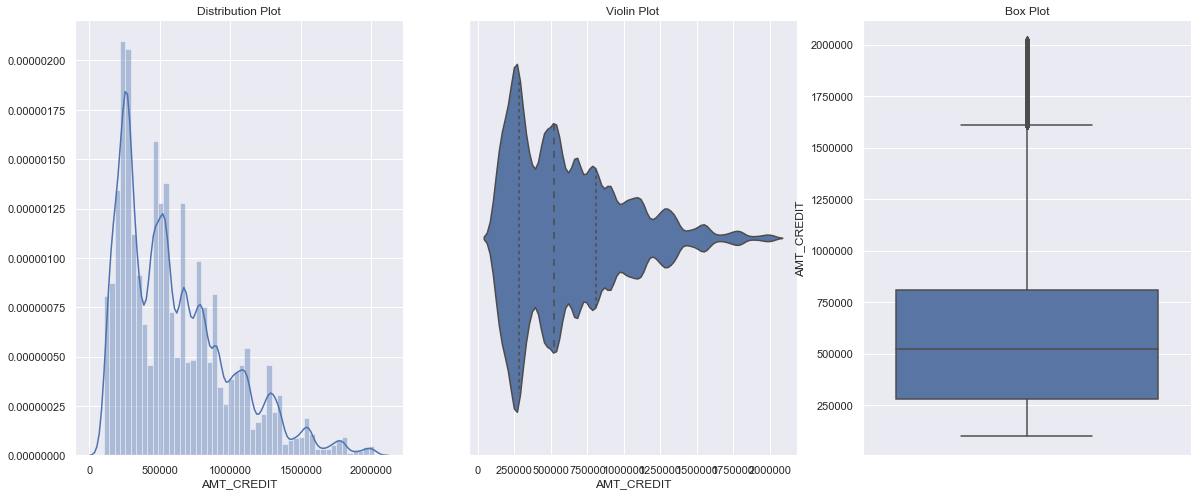

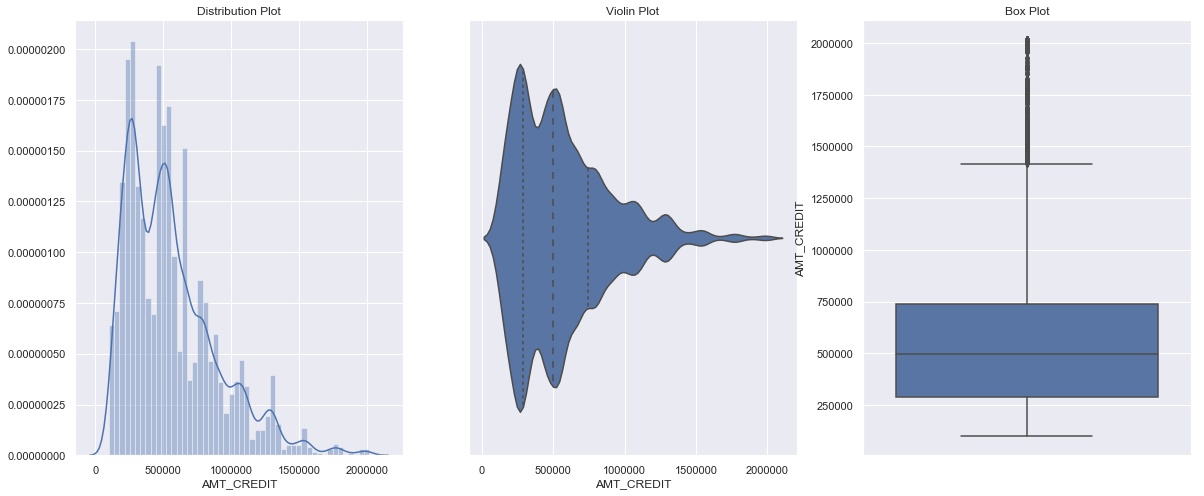

In [24]:
##Univariate Analysis: 
## Continuous Variable: Loan Amount [Amt_credit]
print(round(100*workingDataset['Loan_Amnt_Range'].value_counts(normalize=True)))
colAnalysis(workingDataset,'AMT_CREDIT',0)
colAnalysis(df_0,'AMT_CREDIT',0)
colAnalysis(df_1,'AMT_CREDIT',0)
#### Inference:
#### Loan amount ['AMT_CREDIT'] has approx 84% of values with the maximum value of loans ranging between 5- 10 lacs, followed 
#### followed by low value loans between 1-3 lacs. Analysis for the default data reveals that 75% of the default cases are the ones where 
#### the loan ampunt is less than approx 8 lacs

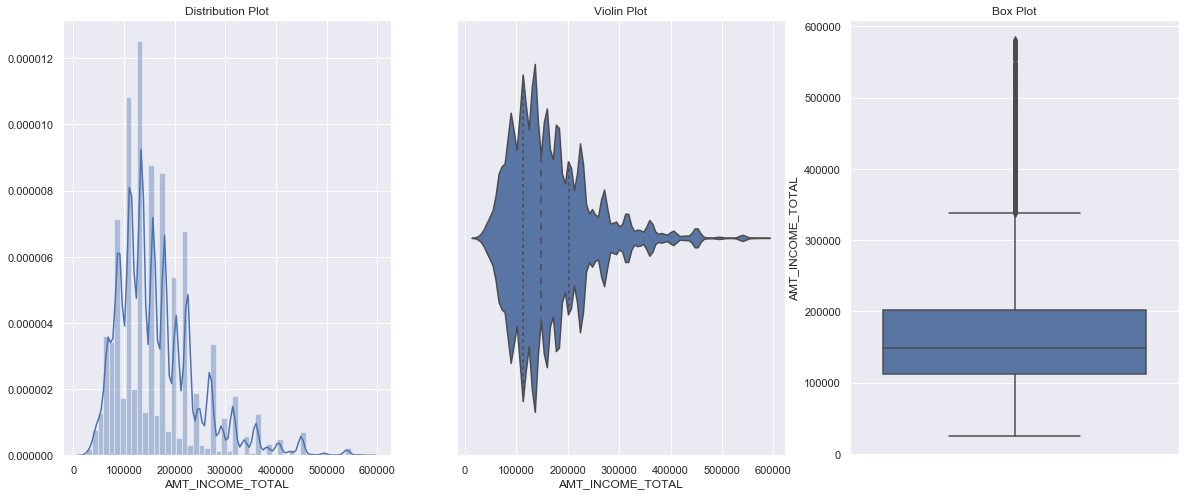

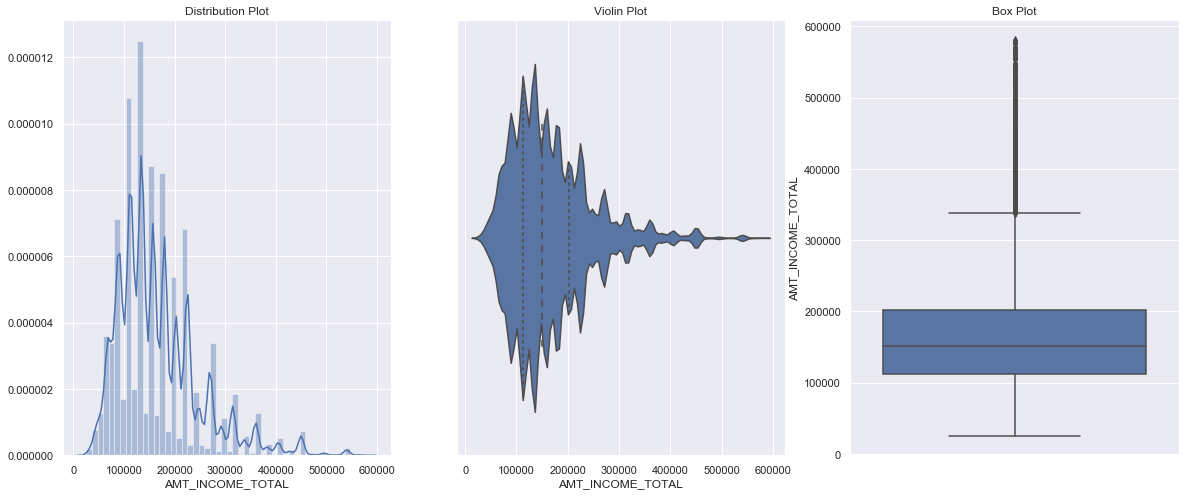

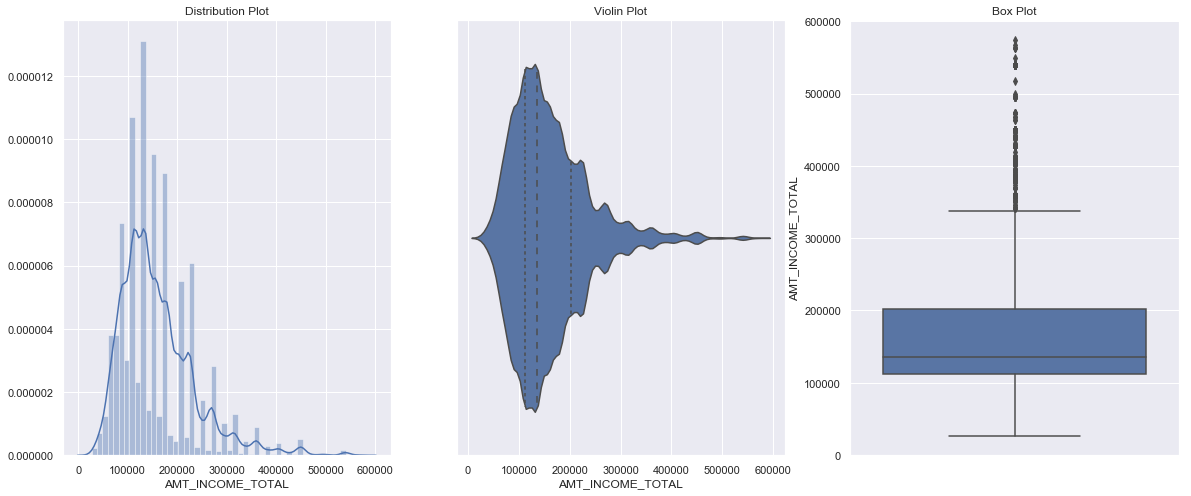

In [25]:
##Univariate Analysis: 
## Continuous Variable: Customer Income [AMT_INCOME_TOTAL]
colAnalysis(workingDataset,'AMT_INCOME_TOTAL',0)
colAnalysis(df_0,'AMT_INCOME_TOTAL',0)
colAnalysis(df_1,'AMT_INCOME_TOTAL',0)

#### Inference: 75% of customers who applied for a loan have an income less than 2 lacs and this figure is similar for both 
#### cases of defaults or no defaults. So this is variable does not give us much information about a customer on the loan default

In [26]:
workingDataset.select_dtypes(include=['int64']).head()
#workingDataset['EmployedYrs'].value_counts().sort_values(ascending=False)

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,Age,EmployedYrs
0,100002,1,0,-9461,-637,-2120,1,1,0,1,1,0,1,2,2,10,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,2
1,100003,0,0,-16765,-1188,-291,1,1,0,1,1,0,2,1,1,11,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46,3
2,100004,0,0,-19046,-225,-2531,1,1,1,1,1,0,1,2,2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52,1
3,100006,0,0,-19005,-3039,-2437,1,1,0,1,0,0,2,2,2,17,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52,8
4,100007,0,0,-19932,-3038,-3458,1,1,0,1,0,0,1,2,2,11,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,55,8


(30, 40]     27.0
(40, 50]     25.0
(50, 60]     22.0
(20, 30]     16.0
(60, 100]    10.0
Name: AgeBins, dtype: float64


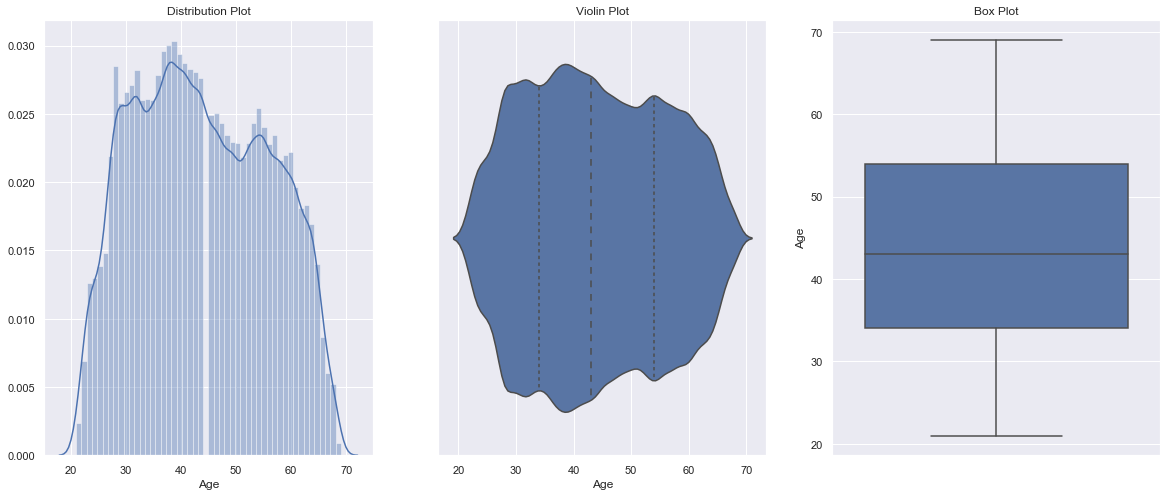

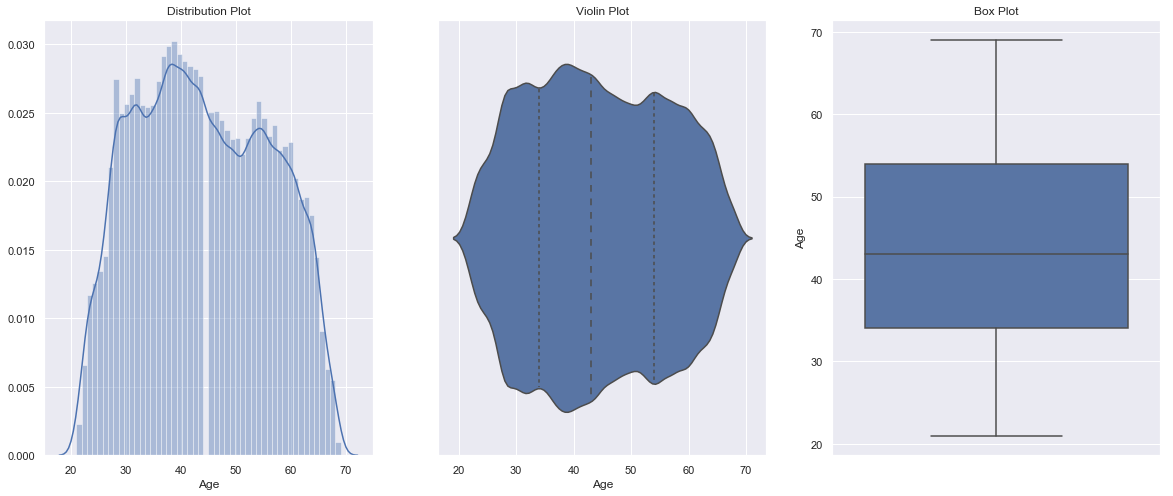

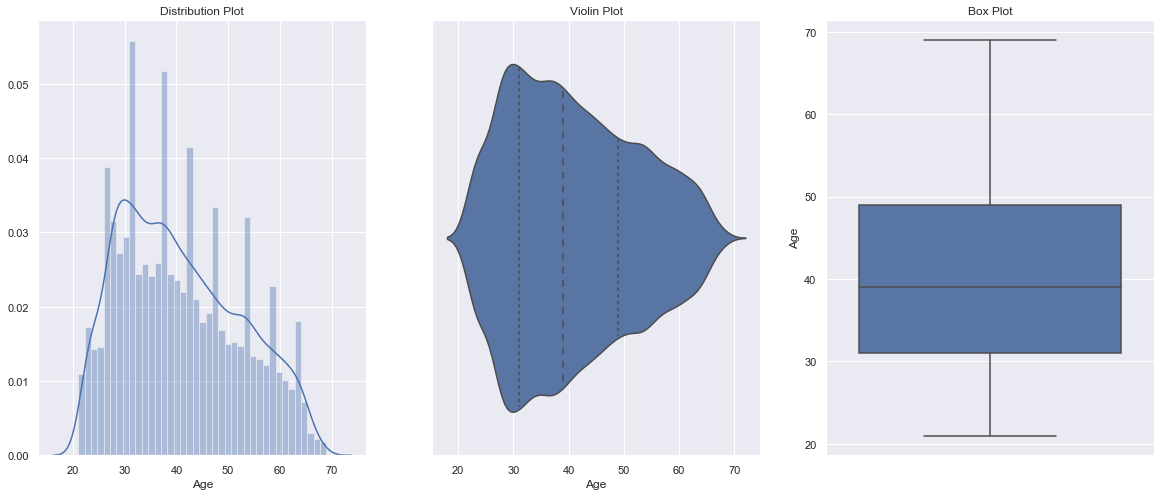

In [27]:
##Univariate Analysis: 
## Continuous Variable: Customer Age [Age]
print(round(100*workingDataset['AgeBins'].value_counts(normalize=True)))
colAnalysis(workingDataset,'Age',0)
colAnalysis(df_0,'Age',0)
colAnalysis(df_1,'Age',0)

#### Inference: 75 percentile of customers who applied for a loan are less than approx 55 years of age and above 
#### approx 32 years. Analyzing the data of defaulting customers, it is found that the interquartile range is between the 
#### the years of  approx 32-48 years.

1    29.23
2     9.98
3     9.02
4     7.46
5     6.25
6     5.01
7     4.58
8     4.03
Name: EmployedYrs, dtype: float64
1    28.11
2    13.61
3    11.51
4     8.76
5     6.84
6     4.89
0     4.19
7     4.09
Name: EmployedYrs, dtype: float64


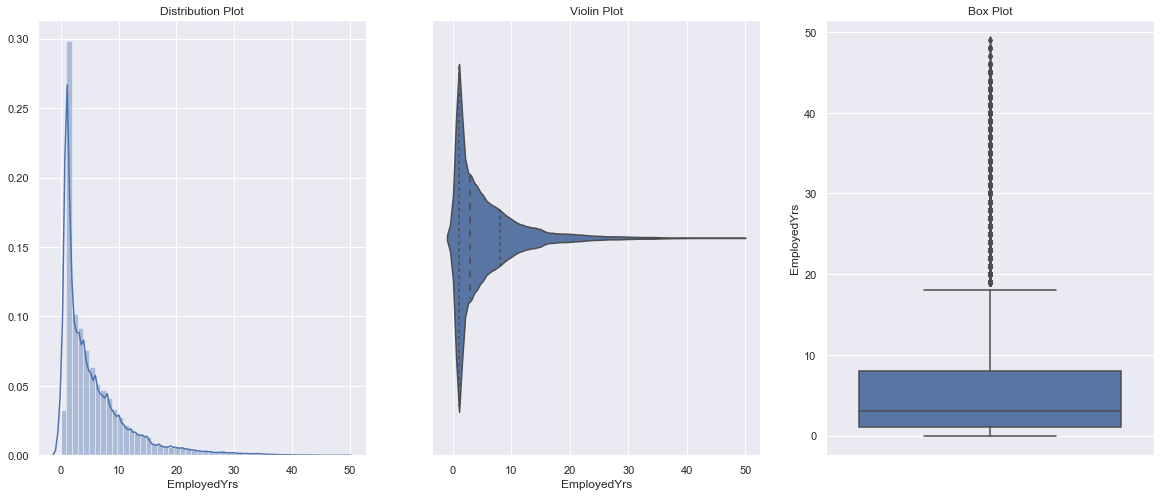

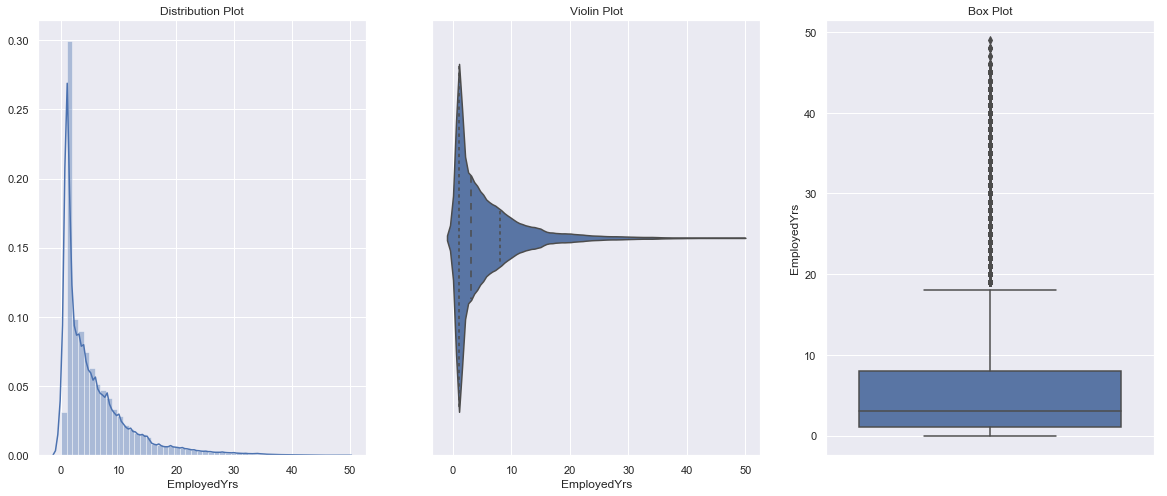

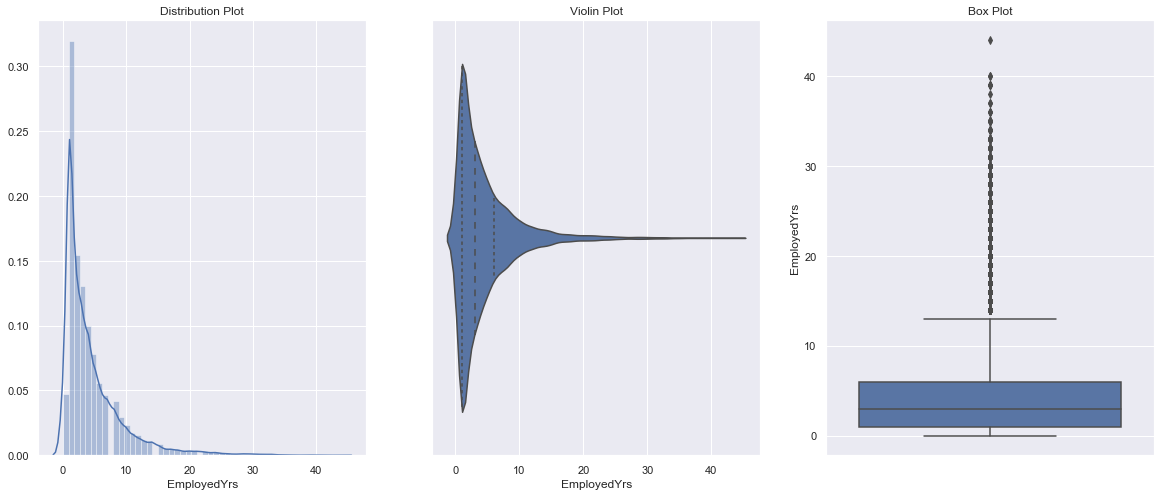

In [28]:
##Univariate Analysis: 
## Continuous Variable: Customer Employment in years at the time of applying the loan [EmployedYrs]
print(round(100*workingDataset['EmployedYrs'].value_counts(normalize=True),2).head(8))
print(round(100*df_1['EmployedYrs'].value_counts(normalize=True),2).head(8))
colAnalysis(workingDataset,'EmployedYrs',0)
colAnalysis(df_0,'EmployedYrs',0)
colAnalysis(df_1,'EmployedYrs',0)

#### Inference: 48% of customers who took loan had less than 3 years of work experience. Similarly on analyzing the data of 
#### defaulters it is found that 56% of customers had less than 3 year of experience.

2    51.63
1    21.91
3    17.13
4     8.02
5     1.13
Name: CNT_FAM_MEMBERS, dtype: float64
2    48.46
1    22.73
3    18.60
4     8.60
5     1.32
Name: CNT_FAM_MEMBERS, dtype: float64


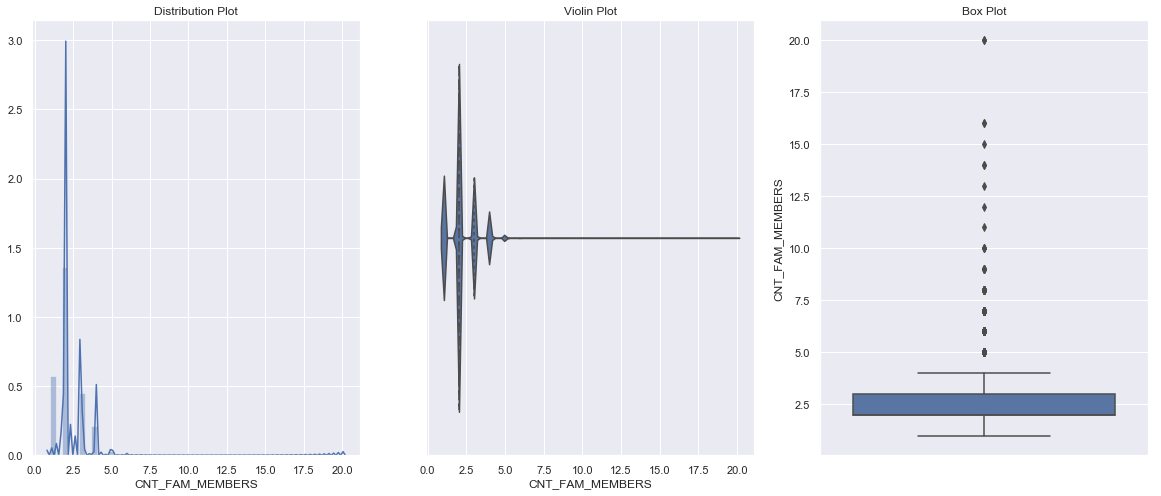

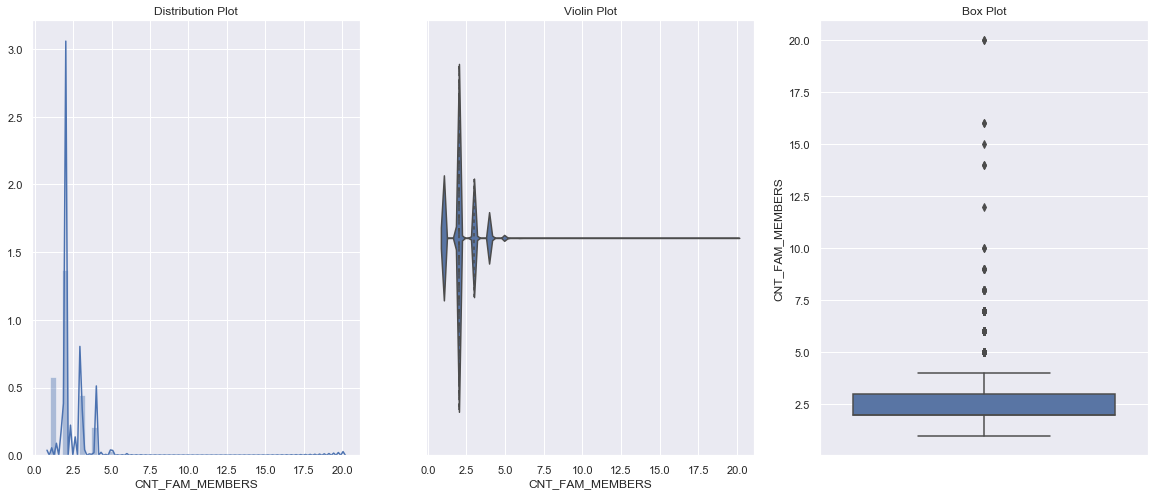

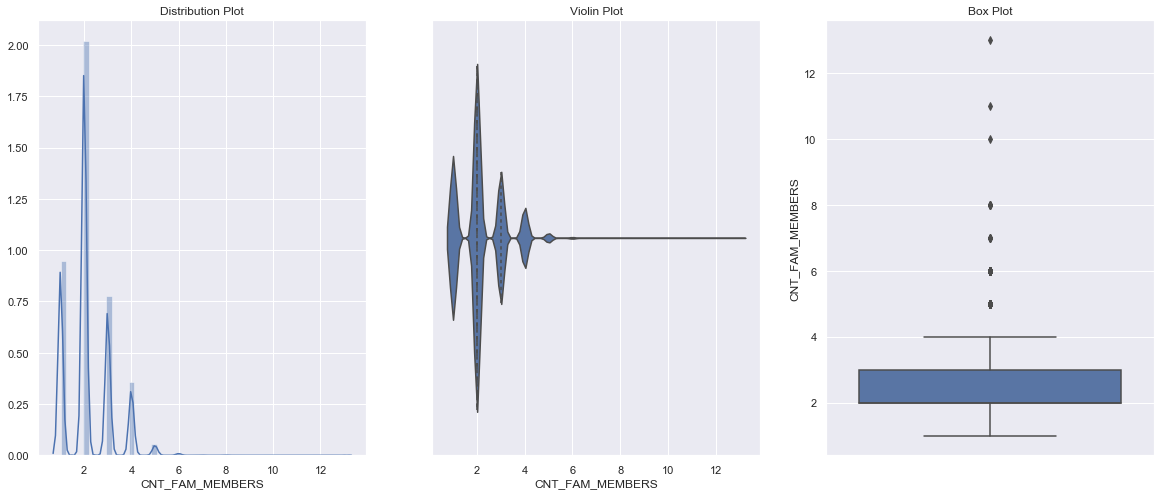

In [29]:
##Univariate Analysis: 
## Continuous Variable: Number of family members of the customer[CNT_FAM_MEMBERS]
print(round(100*workingDataset['CNT_FAM_MEMBERS'].value_counts(normalize=True),2).head())
print(round(100*df_1['CNT_FAM_MEMBERS'].value_counts(normalize=True),2).head())
colAnalysis(workingDataset,'CNT_FAM_MEMBERS',0)
colAnalysis(df_0,'CNT_FAM_MEMBERS',0)
colAnalysis(df_1,'CNT_FAM_MEMBERS',0)

### Inference: The patterns in the count of family mambers at the total level and at a defaulter level showed similar trends 
### indicating that count of family members were not exactly influencing default.

0    70.03
1    19.89
2     8.69
3     1.21
4     0.14
Name: CNT_CHILDREN, dtype: float64
0    66.88
1    22.00
2     9.38
3     1.45
4     0.23
Name: CNT_CHILDREN, dtype: float64


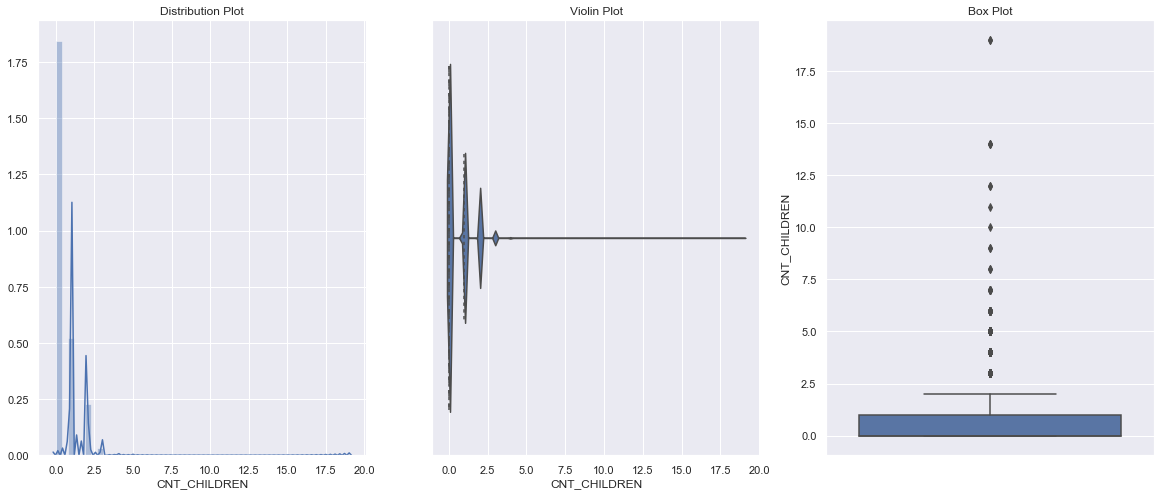

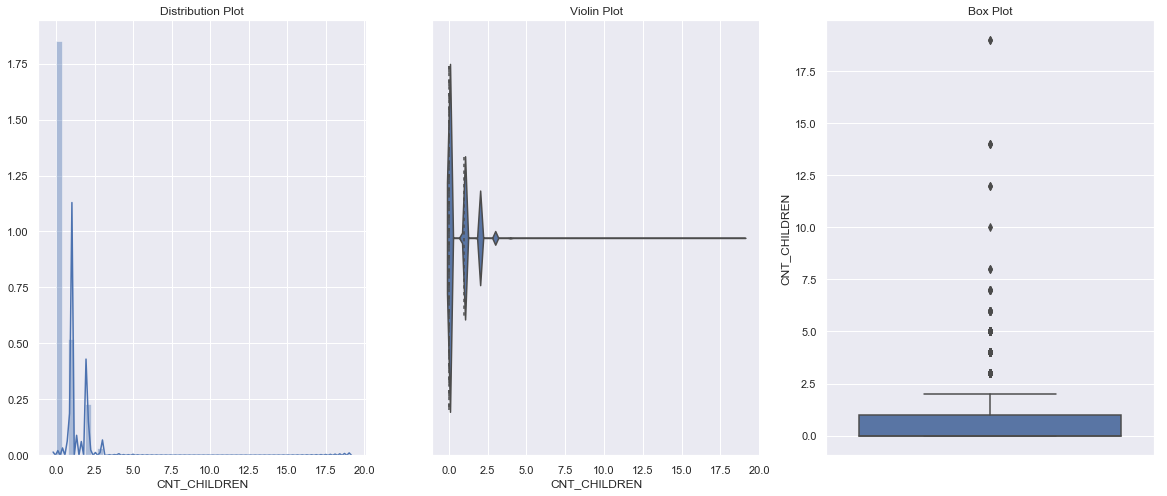

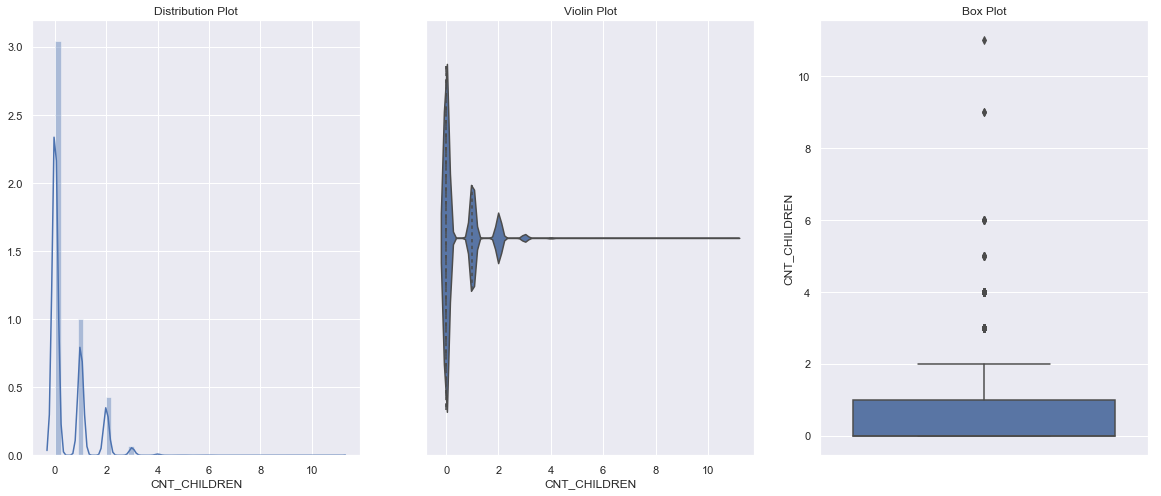

In [30]:
##Univariate Analysis: 
## Continuous Variable: Number of children of the customer[CNT_CHILDREN]
print(round(100*workingDataset['CNT_CHILDREN'].value_counts(normalize=True),2).head())
print(round(100*df_1['CNT_CHILDREN'].value_counts(normalize=True),2).head())
colAnalysis(workingDataset,'CNT_CHILDREN',0)
colAnalysis(df_0,'CNT_CHILDREN',0)
colAnalysis(df_1,'CNT_CHILDREN',0)

### Inference: The patterns in the count of children at the total level and at a defaulter level showed similar trends 
### indicating that count of family members were not exactly influencing default.

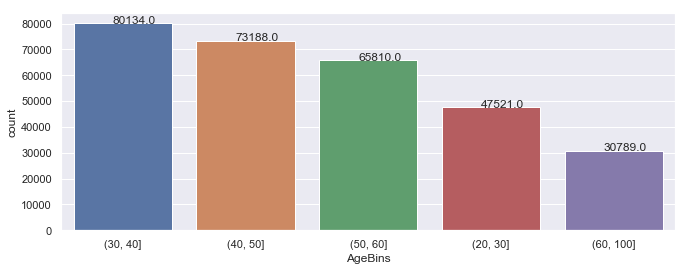

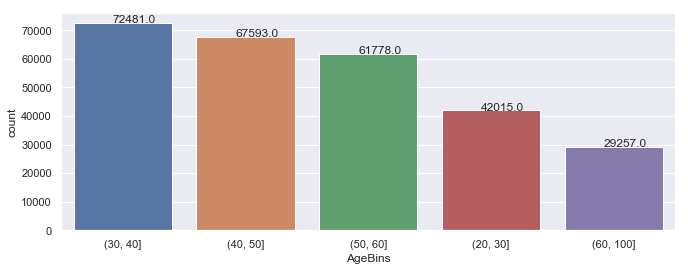

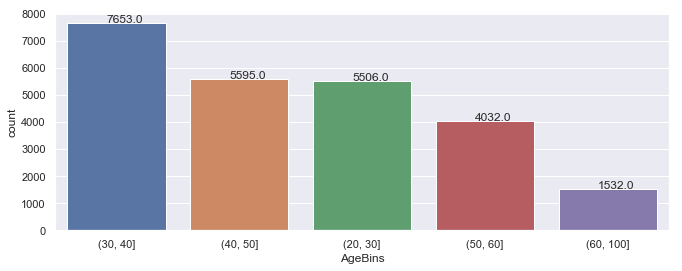

In [31]:
##Univariate Analysis: 
## Categorical Data: Age bins of customers taking loans
colAnalysis(workingDataset,'AgeBins',1)
colAnalysis(df_0,'AgeBins',1)
colAnalysis(df_1,'AgeBins',1)

#### Inference: Analysis of the data of defaulters indicates that almost 30% of customers lie in the age group of 30-40 
### and the distribution of defaulting customers in this age group is higher than the distribution of total customers

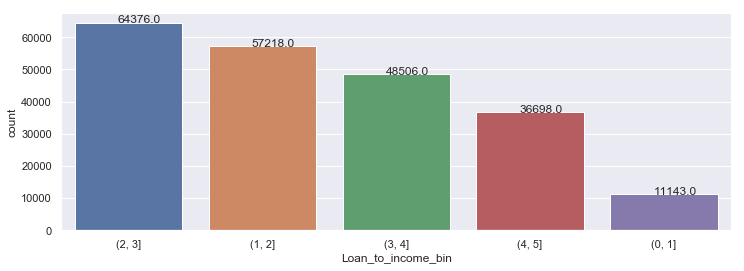

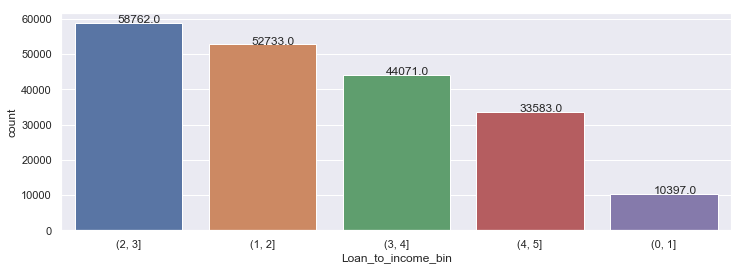

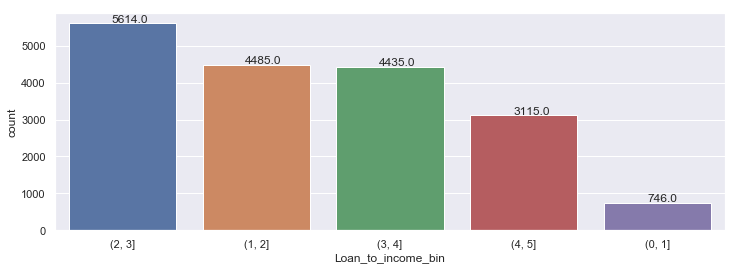

In [32]:
##Univariate Analysis: 
## Categorical Data: Loan to Income ratio bins of customers taking loans

plt.close('All')
colAnalysis(workingDataset,'Loan_to_income_bin',1)
colAnalysis(df_0,'Loan_to_income_bin',1)
colAnalysis(df_1,'Loan_to_income_bin',1)

#### Inference : This data shows that there is a higher propensity of customers to default whose loan amounts 
#### are 2-3 times their income. It also shows logically that customers taking loans leass than their income have a lower
#### incidence of default.

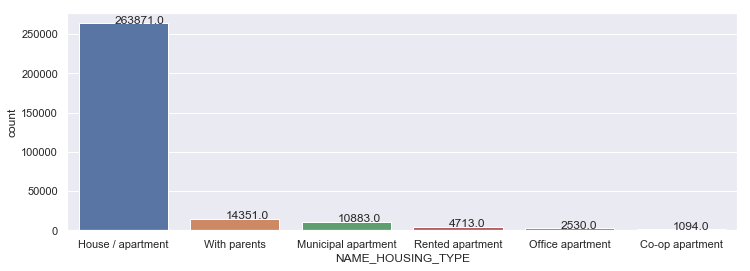

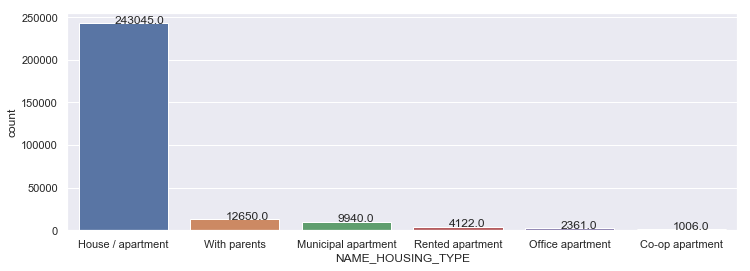

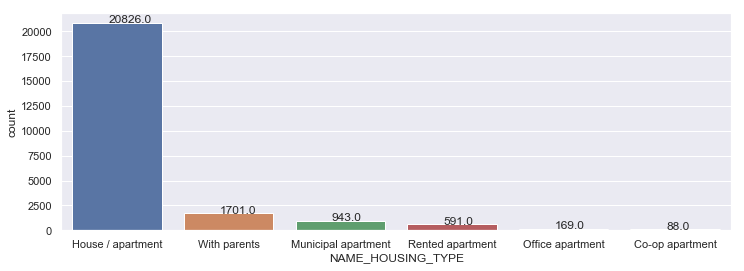

In [33]:
##Univariate Analysis: 
## Categorical Data: NAME_HOUSING_TYPE - Type of Current House of customers taking loans

plt.close('All')
colAnalysis(workingDataset,'NAME_HOUSING_TYPE',1)
colAnalysis(df_0,'NAME_HOUSING_TYPE',1)
colAnalysis(df_1,'NAME_HOUSING_TYPE',1)

#### Inference: Type of current house doesnt seem to indicate any relation of a customer defaulting on their loans
#### as distribution for people who pay and those who default are similar.

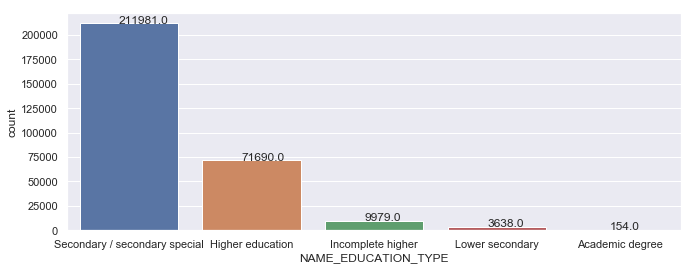

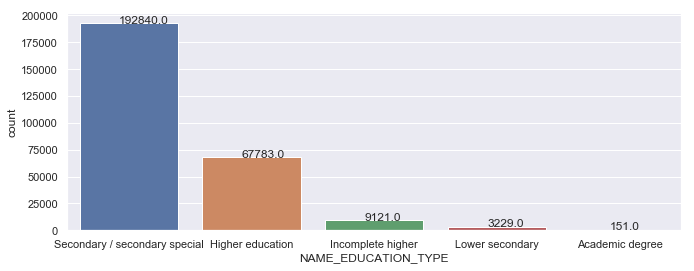

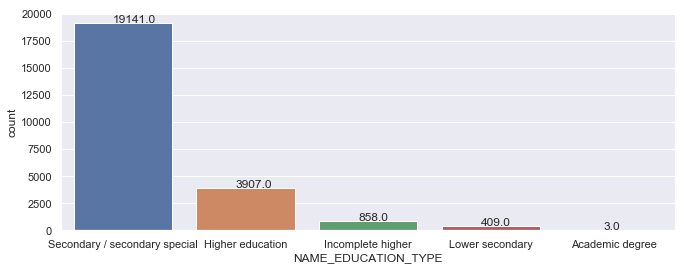

In [34]:
##Univariate Analysis: 
## Categorical Data: Type of Education [NAME_EDUCATION_TYPE] of customers taking loans

plt.close('All')
colAnalysis(workingDataset,'NAME_EDUCATION_TYPE',1)
colAnalysis(df_0,'NAME_EDUCATION_TYPE',1)
colAnalysis(df_1,'NAME_EDUCATION_TYPE',1)

#### Inference: Education type seems to be significant as a hiher percentage of customers (approx 78%) seem to default having 
#### 

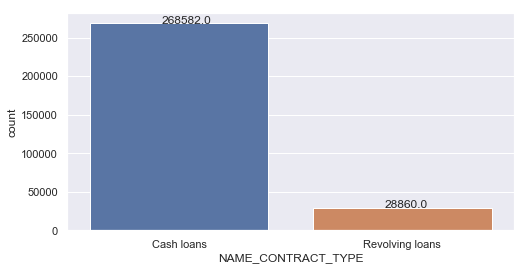

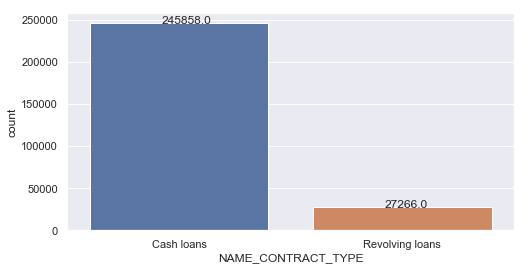

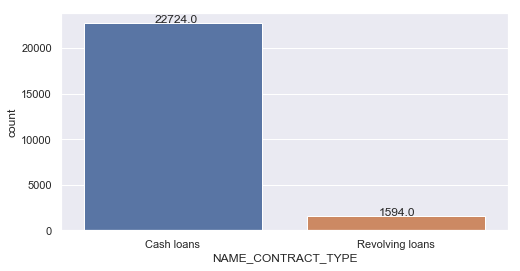

In [35]:
##Univariate Analysis: 
## Categorical Data: NAME_CONTRACT_TYPE - Type of loans

plt.close('All')
colAnalysis(workingDataset,'NAME_CONTRACT_TYPE',1)
colAnalysis(df_0,'NAME_CONTRACT_TYPE',1)
colAnalysis(df_1,'NAME_CONTRACT_TYPE',1)

#### Inference: Type of loans does not seem to be a significant factor which causes default though the % of defaulting 
#### customers who have taken cash loans is higher marinally than the total population

### 5. Bivariate Analysis : Next we will do bivariate analysis to identify relationship between variable and their influence in default


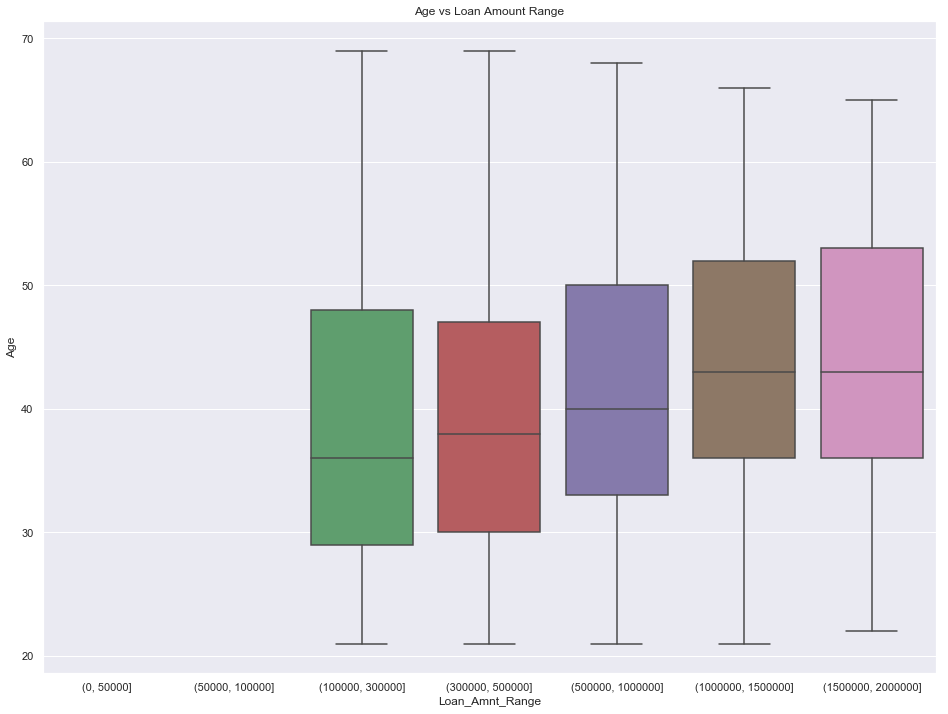

In [36]:
# Loan amount vs the number of members in the family Categorical vs Continuous
plt.figure(figsize=(16,12))
sns.boxplot(data =df_1, x='Loan_Amnt_Range', y='Age')
plt.title('Age vs Loan Amount Range')
plt.show()
plt.close('All')

#### Inference: Loans taken by customers of lesser age are of lesser value. Loans amounts increase with increase in age which 
#### can be attributed to the fact that after a few years of employment and surety of cashflows makes customers go for 
#### loans of higher amounts

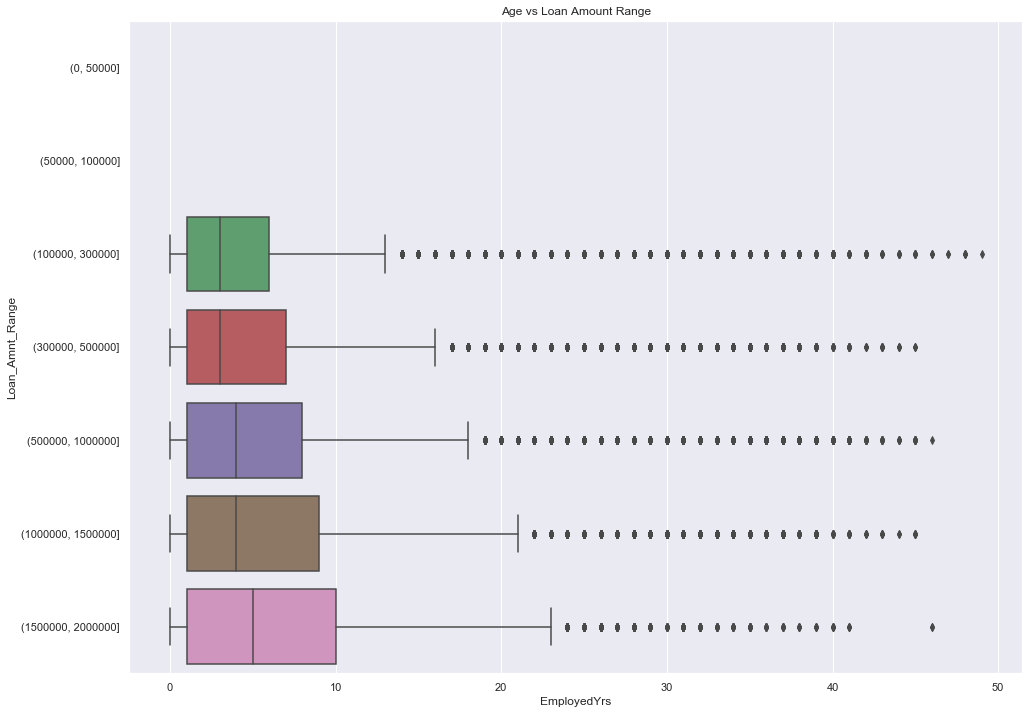

In [47]:
# Loan amount vs the number of members in the family Categorical vs Continuous
plt.figure(figsize=(16,12))
sns.boxplot(data =workingDataset, x='EmployedYrs', y='Loan_Amnt_Range')
plt.title('Age vs Loan Amount Range')
plt.show()
plt.close('All')

#### Inference:Loans amounts increase with increase in age which 
#### can be attributed to the fact that after a few years of employment and surety of cashflows makes customers go for 
#### loans of higher amounts

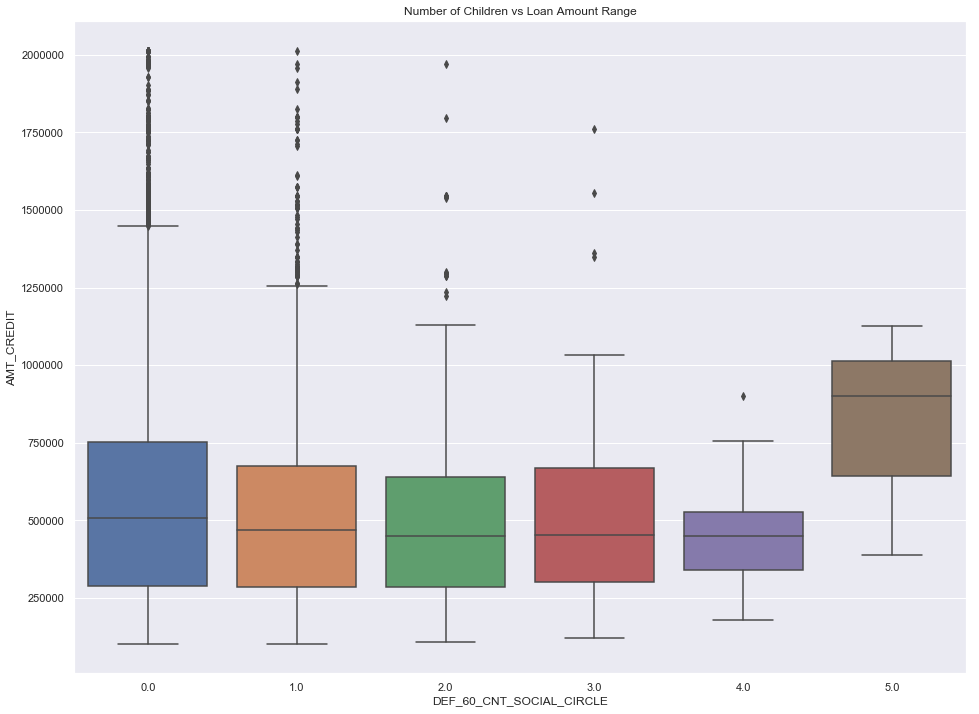

In [52]:
# Loan amount vs the total income of the person Continuous vs Continuous
plt.figure(figsize=(16,12))
sns.boxplot(data =df_1, x='DEF_60_CNT_SOCIAL_CIRCLE', y='AMT_CREDIT')
plt.title('Number of Children vs Loan Amount Range')
plt.show()
plt.close('All')

### Correlation analysis between continuous variables for target data.

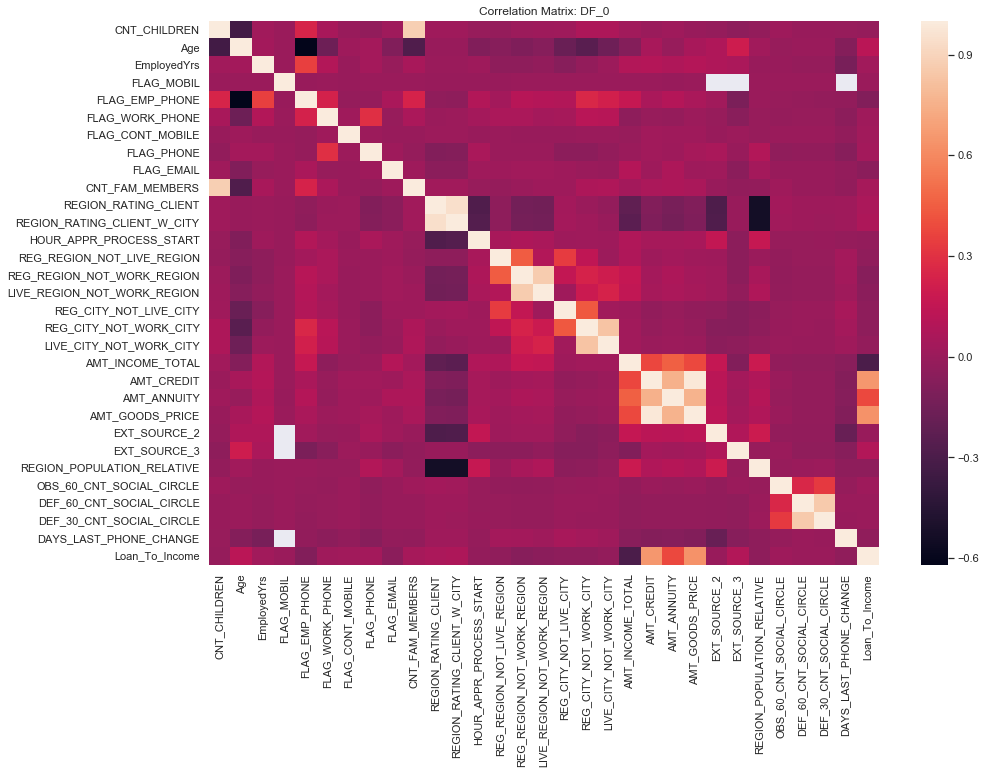

In [40]:
#Correlation analysis of data for DF_0
numericalCols=['CNT_CHILDREN','Age','EmployedYrs','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE',
               'FLAG_EMAIL','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','HOUR_APPR_PROCESS_START',
               'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY',
               'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
               'EXT_SOURCE_2','EXT_SOURCE_3','REGION_POPULATION_RELATIVE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
               'DEF_30_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','Loan_To_Income']
#df_0.select_dtypes(include=['float64']).head()
df_0_corr=df_0[numericalCols]
df_0_CorrMat=df_0_corr.corr()
#df_0_CorrMat.info()
newDF=df_0_CorrMat.unstack().reset_index()
newDF.columns=('Ind','Val','Corr')
#newDF.sort_values(by='Corr', ascending=False)
plt.figure(figsize=(15,10))
sns.heatmap(df_0_CorrMat)
plt.title("Correlation Matrix: DF_0")
plt.show()
plt.close("all")

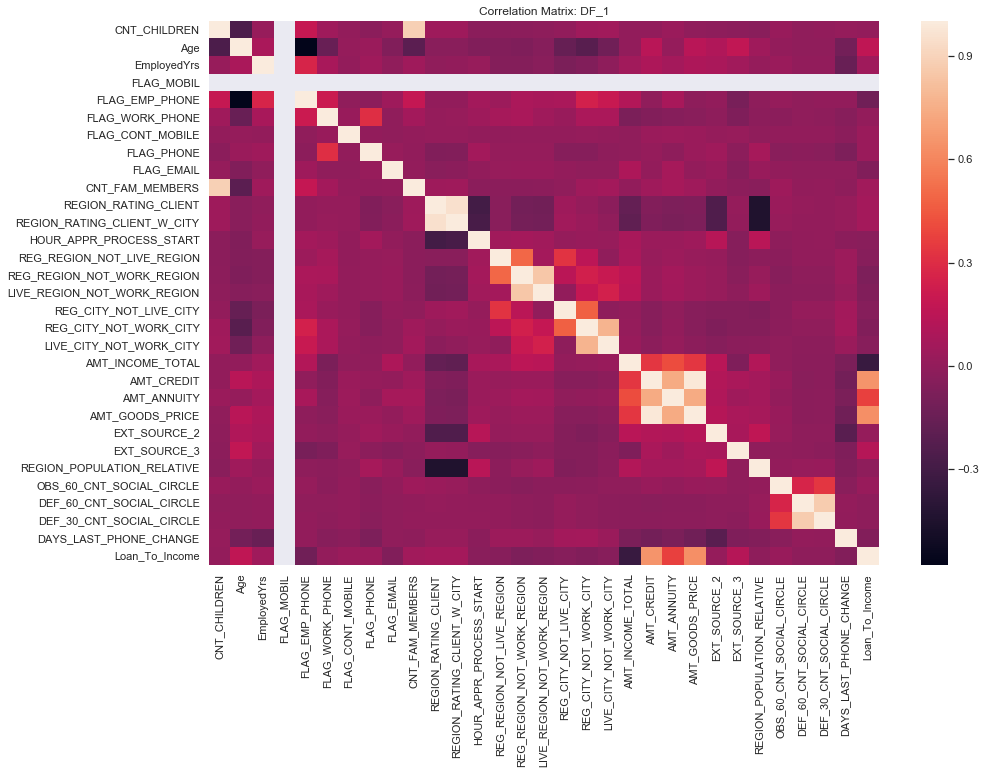

In [41]:
#Correlation analysis of data for DF_1
#numericalCols=['AMT_CREDIT','DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','Age','CNT_FAM_MEMBERS']
df_1_corr=df_1[numericalCols]
df_1_CorrMat=df_1_corr.corr()
plt.figure(figsize=(15,10))
sns.heatmap(df_1_CorrMat)
plt.title("Correlation Matrix: DF_1")
plt.show()
plt.close("all")
#df_1_CorrMat.unstack()

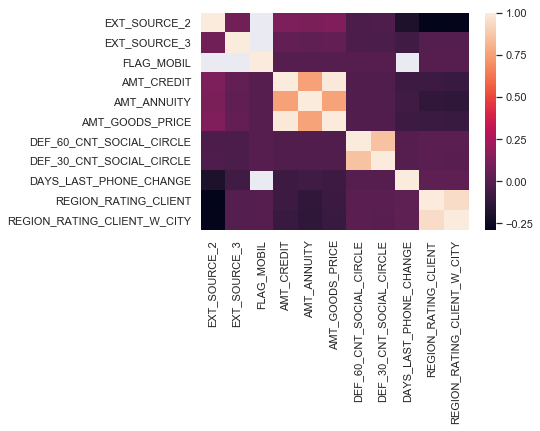

In [43]:
#### Identifying the top 10 correlated Data points
#### Basis analysis of DF_0 below are the top correlated items:
df_0_top10=['EXT_SOURCE_2','EXT_SOURCE_3','FLAG_MOBIL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DEF_60_CNT_SOCIAL_CIRCLE',
               'DEF_30_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']
df_0_top10_CorrMat=df_0[df_0_top10]
df_0_top10_Corr=df_0_top10_CorrMat.corr()
sns.heatmap(df_0_top10_Corr)
plt.show()
plt.close('All')

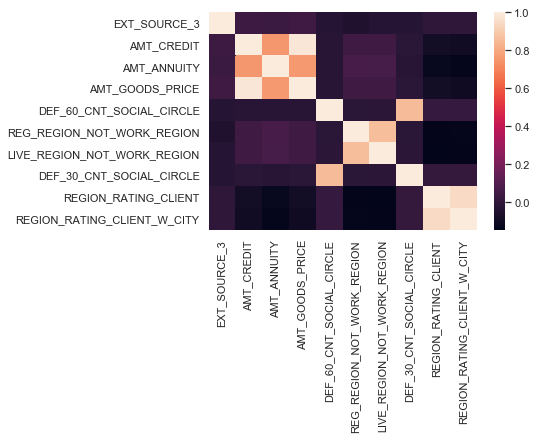

In [45]:
#### Identifying the top 10 correlated Data points
#### Basis analysis of DF_1 below are the top correlated items:
df_0_top10=['EXT_SOURCE_3','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DEF_60_CNT_SOCIAL_CIRCLE','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
            'DEF_30_CNT_SOCIAL_CIRCLE','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']
df_0_top10_CorrMat=df_0[df_0_top10]
df_0_top10_Corr=df_0_top10_CorrMat.corr()
sns.heatmap(df_0_top10_Corr)
plt.show()
plt.close('All')

### Part 2: Analysing Previous_application.csv

In [ ]:
#Analysing Data: Finding the percentage of missing values per column and removing missing columns from Previous_application
# dataset. Also since the previous application dataset was huge and was causing consistent hanging of kernel, 
# I have loaded only 4 lac rows for merged data analysis
prevMaster=pd.read_csv("previous_application.csv")
prevwkData=prevMaster.iloc[:400000,:]
prevwkDataset=pd.DataFrame(prevwkData)
#print(prevwkDataset.shape)
missingData=pd.DataFrame(round(100*prevwkDataset.isnull().sum(axis=0)/len(prevwkDataset.index),2))
missingData.reset_index(inplace=True)
missingData.columns=('col','Value')
#Drop columns where missing data is more than 25%
dropCol=missingData[missingData['Value']>25]
#print(dropCol.sort_values(by='Value', ascending=False))
prevwkDataset.drop(dropCol['col'],axis=1, inplace=True)

#print(prevwkDataset.info())

In [ ]:
### Analyzing specific columns of the previous dataset and merging with the version of the application dataset where the 
### unwanted columns have already been dropped. Then we will merge the two datasets with a right outer join as the 
### previous application may have duplicate rows for a given customer.
workingDataset2=pd.DataFrame(workingDatasetv1)
analysisColPrevData=['SK_ID_PREV','SK_ID_CURR','AMT_APPLICATION','NAME_CONTRACT_TYPE','AMT_CREDIT','NAME_CASH_LOAN_PURPOSE',
'NAME_CONTRACT_STATUS','CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_PORTFOLIO','CNT_PAYMENT','CHANNEL_TYPE']
prevwkDataset2=pd.DataFrame(prevwkDataset[analysisColPrevData])

#prevwkDataset2.head(50).sort_values(by='SK_ID_CURR')
fullData=pd.merge(workingDataset2,prevwkDataset2, on='SK_ID_CURR',how='right')
fullData.head()

In [ ]:
df_0_prev=fullData.loc[fullData.TARGET==0,:]
df_1_prev=fullData.loc[fullData.TARGET==1,:]
print(df_0_prev.shape)
print(df_1_prev.shape)

### Univariate Analysis on few columns for Merged Dataset

In [ ]:
##Univariate Analysis: 
## Categorical Data: Status of Previous application of customers taking loans
colAnalysis(fullData,'NAME_CONTRACT_STATUS',1)
colAnalysis(df_0_prev,'NAME_CONTRACT_STATUS',1)
colAnalysis(df_1_prev,'NAME_CONTRACT_STATUS',1)

#### Inference: Basis the third graph of Target=1  we find quite a few inferences 
#### 1.Of the People defaulting on loans, we find that out of total of 29K customers, 16K had their earlier loans approved i.e. 55% of those obtained approvals for previous instances,they defaulted in their payments. 
#### 2.6950[Refused] + 5636[Cancelled] had been refused loans earlier and were given loans which resulted in default. This is type II error where the loan was approved even when they had been refused the loan in the past.
#### 3. Basis first graph of total data - 250724 cases were approved out of 309K cases of which, 29K approx defaulted i.e. approx 11% were type 2 errors
#### 4. Basis First Graph of total data - 

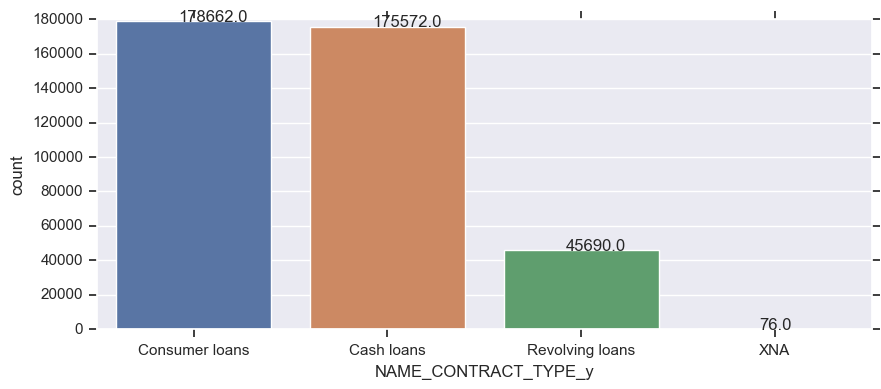

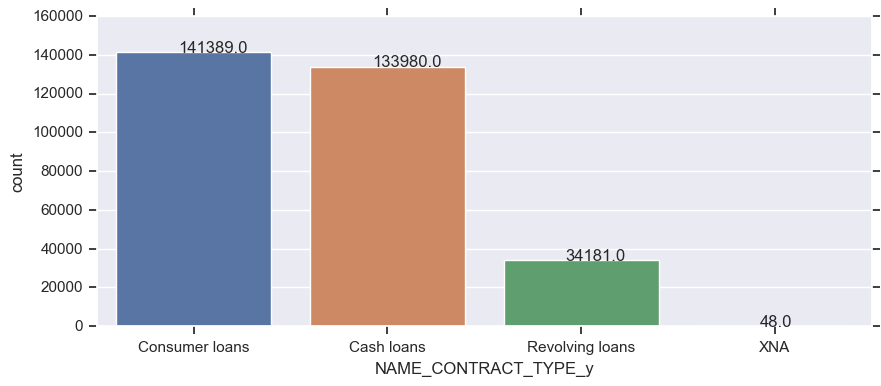

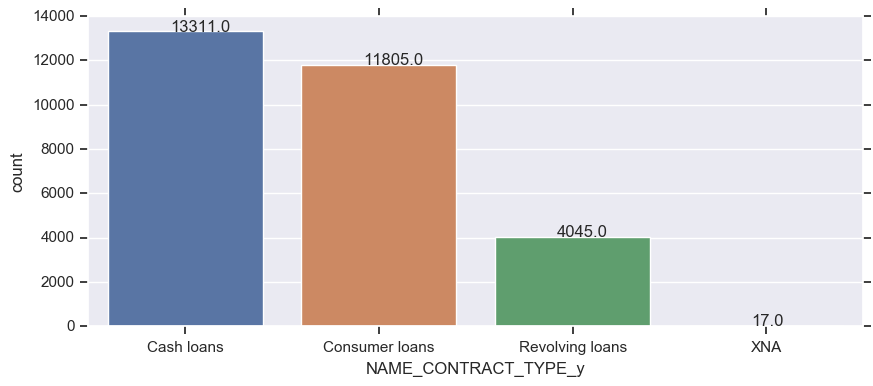

In [43]:
##Univariate Analysis: 
## Categorical Data: Type of loan of Previous application of customers
colAnalysis(fullData,'NAME_CONTRACT_TYPE_y',1)
colAnalysis(df_0_prev,'NAME_CONTRACT_TYPE_y',1)
colAnalysis(df_1_prev,'NAME_CONTRACT_TYPE_y',1)

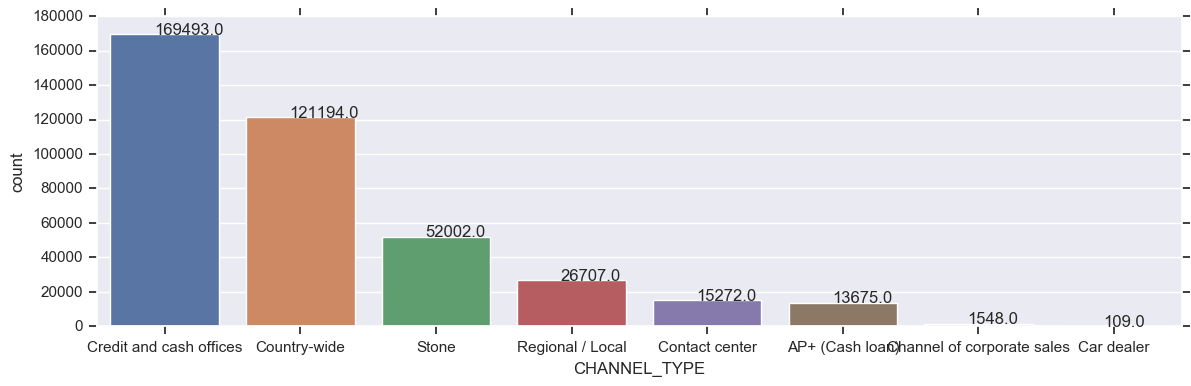

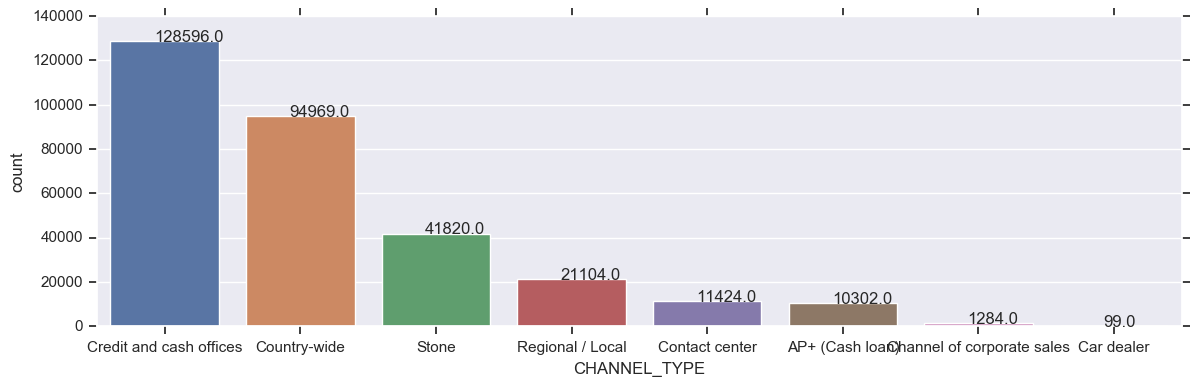

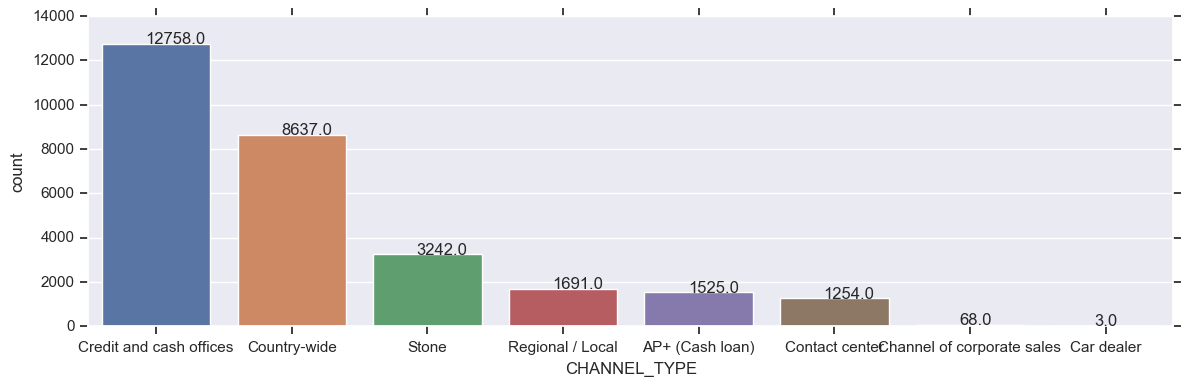

In [44]:
##Univariate Analysis: 
## Categorical Data: Channel of sourcing the customer
colAnalysis(fullData,'CHANNEL_TYPE',1)
colAnalysis(df_0_prev,'CHANNEL_TYPE',1)
colAnalysis(df_1_prev,'CHANNEL_TYPE',1)